In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras import layers

Using TensorFlow backend.


In [2]:
tf.__version__

'1.12.0'

In [3]:
data1 = pd.read_csv("./data1.csv")

In [4]:
data1

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,p1,p2,p3,e1,e2,e3
0,0,1,22.000000,1,0,7.2500,-1,0,0,1,1,0,0
1,1,0,38.000000,1,0,71.2833,0,1,0,0,0,1,0
2,1,0,26.000000,0,0,7.9250,-1,0,0,1,1,0,0
3,1,0,35.000000,1,0,53.1000,1,1,0,0,1,0,0
4,0,1,35.000000,0,0,8.0500,-1,0,0,1,1,0,0
5,0,1,29.699118,0,0,8.4583,-1,0,0,1,0,0,1
6,0,1,54.000000,0,0,51.8625,2,1,0,0,1,0,0
7,0,1,2.000000,3,1,21.0750,-1,0,0,1,1,0,0
8,1,0,27.000000,0,2,11.1333,-1,0,0,1,1,0,0
9,1,0,14.000000,1,0,30.0708,-1,0,1,0,0,1,0


In [5]:
data1_train = data1[['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin','p1', 'p2', 'p3', 'e1', 'e2', 'e3']]

data1_target = data1['Survived'].values.reshape(len(data1),1)

In [6]:
np.shape(data1_train), np.shape(data1_target)

((891, 12), (891, 1))

In [58]:
# x = tf.placeholder('float', shape=[None, 12])
# y = tf.placeholder('float', shape=[None, 1])

x = data1_train
y = data1_target
print(x.shape,y.shape)

(891, 12) (891, 1)


In [60]:
x

,Sex,Age,SibSp,Parch,Fare,Cabin,p1,p2,p3,e1,e2,e3
0,1,22.000000,1,0,7.2500,-1,0,0,1,1,0,0
1,0,38.000000,1,0,71.2833,0,1,0,0,0,1,0
2,0,26.000000,0,0,7.9250,-1,0,0,1,1,0,0
3,0,35.000000,1,0,53.1000,1,1,0,0,1,0,0
4,1,35.000000,0,0,8.0500,-1,0,0,1,1,0,0
5,1,29.699118,0,0,8.4583,-1,0,0,1,0,0,1
6,1,54.000000,0,0,51.8625,2,1,0,0,1,0,0
7,1,2.000000,3,1,21.0750,-1,0,0,1,1,0,0
8,0,27.000000,0,2,11.1333,-1,0,0,1,1,0,0
9,0,14.000000,1,0,30.0708,-1,0,1,0,0,1,0


In [41]:
model = keras.Sequential()

In [42]:
model.add(layers.Dense(1,input_dim=12,activation='sigmoid'))

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 13        
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['acc']
)

In [45]:
history = model.fit(x, y, epochs = 500)

Epoch 1/500
891/891 [==============================] - 0s 249us/step - loss: 9.2274 - acc: 0.3838
Epoch 2/500
891/891 [==============================] - 0s 53us/step - loss: 8.9336 - acc: 0.3838
Epoch 3/500
891/891 [==============================] - 0s 96us/step - loss: 8.5742 - acc: 0.3861
Epoch 4/500
891/891 [==============================] - 0s 72us/step - loss: 8.1215 - acc: 0.3861
Epoch 5/500
891/891 [==============================] - 0s 76us/step - loss: 7.5652 - acc: 0.3861
Epoch 6/500
891/891 [==============================] - 0s 90us/step - loss: 6.8824 - acc: 0.3861
Epoch 7/500
891/891 [==============================] - 0s 79us/step - loss: 6.0772 - acc: 0.3805
Epoch 8/500
891/891 [==============================] - 0s 71us/step - loss: 5.1923 - acc: 0.3782
Epoch 9/500
891/891 [==============================] - 0s 76us/step - loss: 4.2822 - acc: 0.3760
Epoch 10/500
891/891 [==============================] - 0s 99us/step - loss: 3.3791 - acc: 0.3760
Epoch 11/500
891/891 [======

891/891 [==============================] - 0s 83us/step - loss: 0.5270 - acc: 0.7284
Epoch 85/500
891/891 [==============================] - 0s 93us/step - loss: 0.5230 - acc: 0.7340
Epoch 86/500
891/891 [==============================] - 0s 88us/step - loss: 0.5212 - acc: 0.7374
Epoch 87/500
891/891 [==============================] - 0s 75us/step - loss: 0.5196 - acc: 0.7396
Epoch 88/500
891/891 [==============================] - 0s 100us/step - loss: 0.5183 - acc: 0.7430
Epoch 89/500
891/891 [==============================] - 0s 71us/step - loss: 0.5176 - acc: 0.7452
Epoch 90/500
891/891 [==============================] - 0s 84us/step - loss: 0.5160 - acc: 0.7452
Epoch 91/500
891/891 [==============================] - 0s 80us/step - loss: 0.5157 - acc: 0.7430
Epoch 92/500
891/891 [==============================] - 0s 70us/step - loss: 0.5140 - acc: 0.7553
Epoch 93/500
891/891 [==============================] - 0s 62us/step - loss: 0.5123 - acc: 0.7464
Epoch 94/500
891/891 [==========

891/891 [==============================] - 0s 72us/step - loss: 0.4614 - acc: 0.8103
Epoch 168/500
891/891 [==============================] - 0s 80us/step - loss: 0.4609 - acc: 0.8114
Epoch 169/500
891/891 [==============================] - 0s 74us/step - loss: 0.4600 - acc: 0.8182
Epoch 170/500
891/891 [==============================] - 0s 74us/step - loss: 0.4588 - acc: 0.8171
Epoch 171/500
891/891 [==============================] - 0s 78us/step - loss: 0.4593 - acc: 0.8137
Epoch 172/500
891/891 [==============================] - 0s 77us/step - loss: 0.4581 - acc: 0.8092
Epoch 173/500
891/891 [==============================] - 0s 73us/step - loss: 0.4592 - acc: 0.8126
Epoch 174/500
891/891 [==============================] - 0s 74us/step - loss: 0.4588 - acc: 0.8148
Epoch 175/500
891/891 [==============================] - 0s 73us/step - loss: 0.4627 - acc: 0.8103
Epoch 176/500
891/891 [==============================] - 0s 71us/step - loss: 0.4583 - acc: 0.8114
Epoch 177/500
891/891 [=

891/891 [==============================] - 0s 75us/step - loss: 0.4436 - acc: 0.8092
Epoch 250/500
891/891 [==============================] - 0s 93us/step - loss: 0.4438 - acc: 0.8092
Epoch 251/500
891/891 [==============================] - 0s 76us/step - loss: 0.4453 - acc: 0.8092
Epoch 252/500
891/891 [==============================] - 0s 79us/step - loss: 0.4436 - acc: 0.8103
Epoch 253/500
891/891 [==============================] - 0s 77us/step - loss: 0.4424 - acc: 0.8092
Epoch 254/500
891/891 [==============================] - 0s 80us/step - loss: 0.4428 - acc: 0.8137
Epoch 255/500
891/891 [==============================] - 0s 84us/step - loss: 0.4431 - acc: 0.8103
Epoch 256/500
891/891 [==============================] - 0s 80us/step - loss: 0.4444 - acc: 0.8013
Epoch 257/500
891/891 [==============================] - 0s 79us/step - loss: 0.4434 - acc: 0.8148
Epoch 258/500
891/891 [==============================] - 0s 73us/step - loss: 0.4430 - acc: 0.8058
Epoch 259/500
891/891 [=

891/891 [==============================] - 0s 58us/step - loss: 0.4407 - acc: 0.8025
Epoch 332/500
891/891 [==============================] - 0s 57us/step - loss: 0.4389 - acc: 0.8058
Epoch 333/500
891/891 [==============================] - 0s 64us/step - loss: 0.4395 - acc: 0.8081
Epoch 334/500
891/891 [==============================] - 0s 65us/step - loss: 0.4416 - acc: 0.8092
Epoch 335/500
891/891 [==============================] - 0s 63us/step - loss: 0.4408 - acc: 0.8002
Epoch 336/500
891/891 [==============================] - 0s 60us/step - loss: 0.4397 - acc: 0.8159
Epoch 337/500
891/891 [==============================] - 0s 57us/step - loss: 0.4401 - acc: 0.8114
Epoch 338/500
891/891 [==============================] - 0s 56us/step - loss: 0.4380 - acc: 0.8092
Epoch 339/500
891/891 [==============================] - 0s 58us/step - loss: 0.4390 - acc: 0.8047
Epoch 340/500
891/891 [==============================] - 0s 56us/step - loss: 0.4387 - acc: 0.8092
Epoch 341/500
891/891 [=

891/891 [==============================] - 0s 57us/step - loss: 0.4384 - acc: 0.8137
Epoch 414/500
891/891 [==============================] - 0s 67us/step - loss: 0.4386 - acc: 0.8025
Epoch 415/500
891/891 [==============================] - 0s 54us/step - loss: 0.4410 - acc: 0.7957
Epoch 416/500
891/891 [==============================] - 0s 55us/step - loss: 0.4380 - acc: 0.8036
Epoch 417/500
891/891 [==============================] - 0s 59us/step - loss: 0.4389 - acc: 0.8047
Epoch 418/500
891/891 [==============================] - 0s 57us/step - loss: 0.4369 - acc: 0.8103
Epoch 419/500
891/891 [==============================] - 0s 56us/step - loss: 0.4377 - acc: 0.8058
Epoch 420/500
891/891 [==============================] - 0s 62us/step - loss: 0.4377 - acc: 0.8047
Epoch 421/500
891/891 [==============================] - 0s 65us/step - loss: 0.4382 - acc: 0.8081
Epoch 422/500
891/891 [==============================] - 0s 61us/step - loss: 0.4373 - acc: 0.8081
Epoch 423/500
891/891 [=

891/891 [==============================] - 0s 61us/step - loss: 0.4378 - acc: 0.8036
Epoch 496/500
891/891 [==============================] - 0s 60us/step - loss: 0.4365 - acc: 0.8114
Epoch 497/500
891/891 [==============================] - 0s 59us/step - loss: 0.4395 - acc: 0.8025
Epoch 498/500
891/891 [==============================] - 0s 66us/step - loss: 0.4365 - acc: 0.8047
Epoch 499/500
891/891 [==============================] - 0s 62us/step - loss: 0.4382 - acc: 0.8070
Epoch 500/500
891/891 [==============================] - 0s 57us/step - loss: 0.4371 - acc: 0.8081


In [46]:
history.history.keys()

dict_keys(['loss', 'acc'])

In [47]:
import matplotlib.pyplot as plt


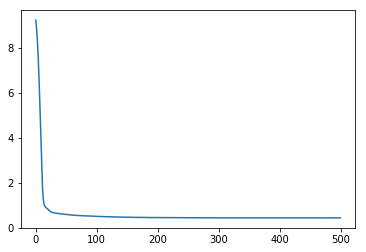

In [48]:
plt.plot(range(500), history.history.get("loss"))

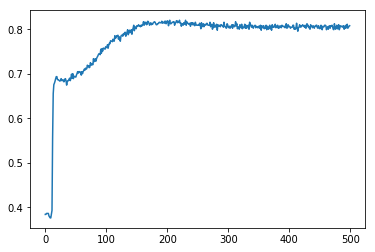

In [49]:
plt.plot(range(500), history.history.get("acc"))